<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_019_hypothesis_testing_titanic_survival_by_gender_and_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Survival by Gender and Class**

In this analysis, we investigated survival rates on the Titanic, focusing on the combined effects of **gender** and **passenger class** on survival outcomes. Our goal was to understand how these variables interact and influence the probability of survival.

---

### **Key Findings**
1. **Gender as a Determinant of Survival**:
   - Women had significantly higher survival rates than men across all passenger classes.
   - For example, women in First Class had the highest survival rates, while men in Third Class had the lowest.

2. **Class as a Determinant of Survival**:
   - Survival rates were higher in First Class and declined progressively through Second and Third Class.
   - This trend was consistent for both men and women.

3. **Interaction Effect Between Gender and Class**:
   - A significant interaction was detected between gender and class, indicating that the effect of gender on survival depends on the passenger’s class.
   - For instance, the survival advantage for women was more pronounced in First Class compared to Third Class.

4. **Pairwise Comparisons**:
   - Post-hoc analysis using **Tukey’s HSD test** revealed significant differences in survival rates for most gender-class combinations.
   - The largest differences were observed between women in First Class and men in Third Class, emphasizing the stark disparities in survival outcomes.

---

### **Statistical Tests and Rationale**
1. **Two-Way ANOVA**:
   - **Why?** To test the main effects of gender and class, and their interaction effect on survival.
   - **Findings:** Both gender and class had significant main effects (\(p < 0.0001\)), and the interaction effect was also significant (\(p < 0.0001\)).

2. **Tukey’s HSD Post-Hoc Test**:
   - **Why?** To identify which specific gender-class combinations had significantly different survival rates.
   - **Findings:** Highlighted significant differences between nearly all pairwise comparisons, with notable gaps between women in higher classes and men in lower classes.





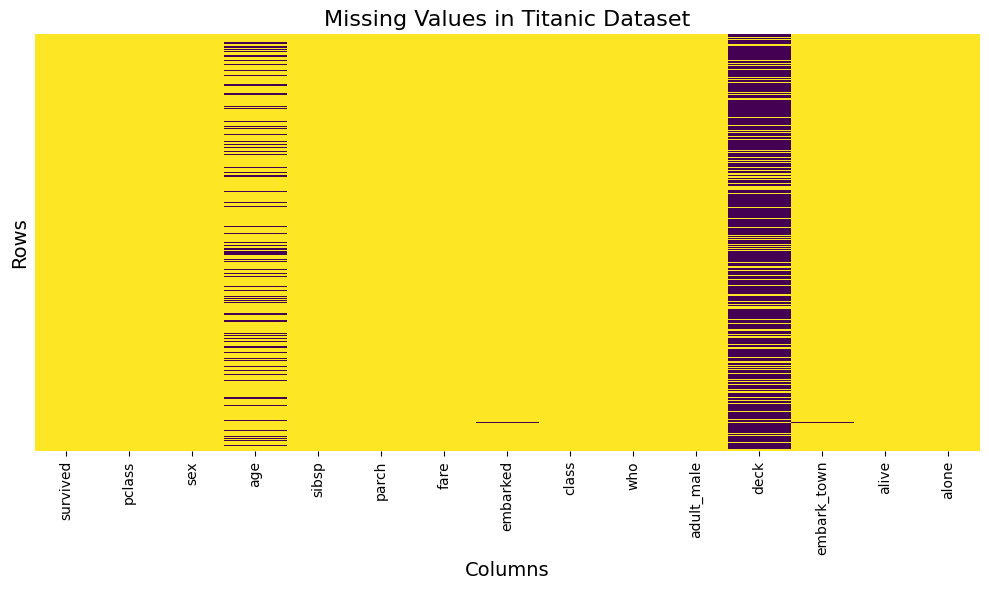

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display the first few rows and summary information
# print(titanic.head())
# print("\nDataset Information:")
# titanic.info()

# Plot missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap="viridis_r", yticklabels=False)
plt.title("Missing Values in Titanic Dataset", fontsize=16)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Rows", fontsize=14)
plt.tight_layout()
plt.show()

# # Calculate percentage of missing values in each column
# missing_percentage = titanic.isnull().mean() * 100
# print("Percentage of Missing Values by Column:")
# print(missing_percentage)
missing_cols = ['deck', 'age', 'embarked', 'embark_town']



### **Why Proportions Z-Test for Survival by Gender?**
1. **The Data is Categorical**:
   - In this case, we are analyzing **proportions** of survivors within each gender group, not continuous measurements like height or weight.  
   - Survival (`survived`) is a **binary variable** (1 = survived, 0 = did not survive). The proportion of survivors within each group (male and female) is what we’re testing.

2. **Z-Test for Proportions**:
   - The **proportions Z-test** is specifically designed to compare the proportions of successes (e.g., survival) between two groups.
   - In this test:
     - **Success count**: Number of survivors in each group.
     - **Sample size**: Total number of individuals in each group.
   - It assumes the data follows a binomial distribution (binary outcomes), which works well for survival data.

3. **Why Not a T-Test?**
   - A **t-test** compares **means** of continuous variables (e.g., heights, weights, scores) between groups.
   - Since survival is not continuous, a t-test would not be appropriate for comparing survival rates.

---

### **When to Use T-Tests vs. Proportions Z-Test**

| **Test**            | **When to Use**                                                                                  | **Example**                                      |
|----------------------|--------------------------------------------------------------------------------------------------|-------------------------------------------------|
| **T-Test**          | When comparing means of **continuous variables** between two groups.                             | Comparing mean flipper length by penguin sex.   |
| **Proportions Z-Test** | When comparing proportions or percentages of **binary outcomes** between two groups.             | Comparing survival rates by gender.             |

---

### **Key Assumptions for Proportions Z-Test**
1. **Binary Outcome**: The dependent variable must be binary (e.g., survival vs. death).
2. **Independent Groups**: Male and female survival rates are independent.
3. **Sample Size**: Large enough for the normal approximation to be valid (this is met in the Titanic dataset).



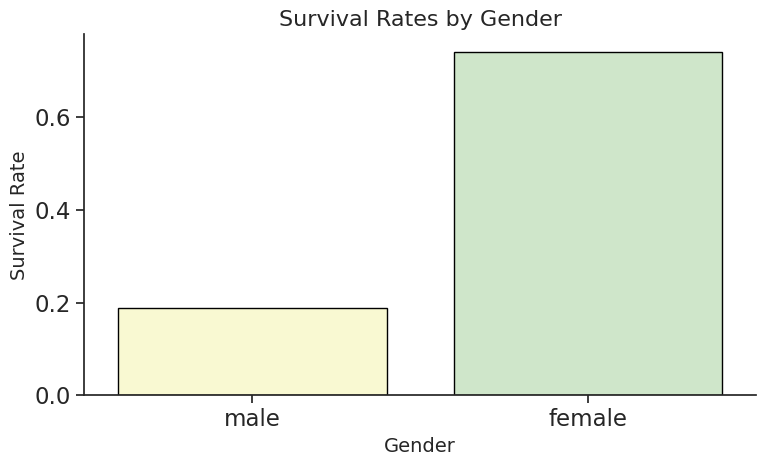

In [ ]:
# Set Seaborn theme, style, and palette
theme_style = "ticks"
palette_name = "Pastel2_r"
context_scale = "notebook"

sns.set_theme(style=theme_style, palette=palette_name)
sns.set_context(context_scale, font_scale=1.5, rc={"lines.linewidth": 2.5})

# Visualization: Survival rates by gender
plt.figure(figsize=(8, 5))
sns.barplot(data=titanic, x='sex', y='survived', errorbar=None, hue='sex', palette="Pastel1_r", edgecolor="k")
plt.title("Survival Rates by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Survival Rate", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

## Hypothesis Test **Survival by Gender**  
- **Question**: Did women have a higher survival rate than men?  
- **Hypotheses**:  
  - **Null Hypothesis (\(H_0\))**: The survival rate of women is equal to the survival rate of men.  
  - **Alternative Hypothesis (\(H_1\))**: The survival rate of women is significantly higher than that of men.  
- **Test**: A one-tailed two-sample proportion test, comparing survival rates between genders.



In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Survival counts by gender
survived_counts = titanic.groupby('sex')['survived'].sum()
total_counts = titanic['sex'].value_counts()

# Proportions Z-Test
count = [survived_counts['female'], survived_counts['male']]
nobs = [total_counts['female'], total_counts['male']]

z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

# Output results
print("Proportions Z-Test Results (One-Tailed):")
print(f"Z-Statistic: {z_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. Women have a significantly higher survival rate than men.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in survival rates.")


Proportions Z-Test Results (One-Tailed):
Z-Statistic: 16.22
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Women have a significantly higher survival rate than men.


### **Summary and Interpretation of Results: Survival by Gender**

#### **Statistical Test**
- **Proportions Z-Test (One-Tailed)**:
  - **Z-Statistic**: \(16.22\) indicates a very large difference between the proportions of survivors among women and men.
  - **P-Value**: \(< 0.0001\), far below the significance threshold (\(\alpha = 0.05\)), confirming that the observed difference is statistically significant.

---

### **Conclusion**
1. **Reject the Null Hypothesis (\(H_0\))**:
   - The survival rate of women is not equal to the survival rate of men.
2. **Support the Alternative Hypothesis (\(H_1\))**:
   - Women have a significantly higher survival rate than men.

---

### **Real-World Interpretation**
This result aligns with historical records and common narratives about the Titanic disaster:
- The policy of "women and children first" may have contributed to the higher survival rate among women.
- The lower survival rate among men reflects the prioritization of other groups during evacuation.

---

### **Next Steps**
1. **Consider Other Factors**:
   - Investigate if class (e.g., First, Second, Third) interacted with gender to influence survival rates.
   - For example, did women in Third Class have a lower survival rate compared to men in First Class?


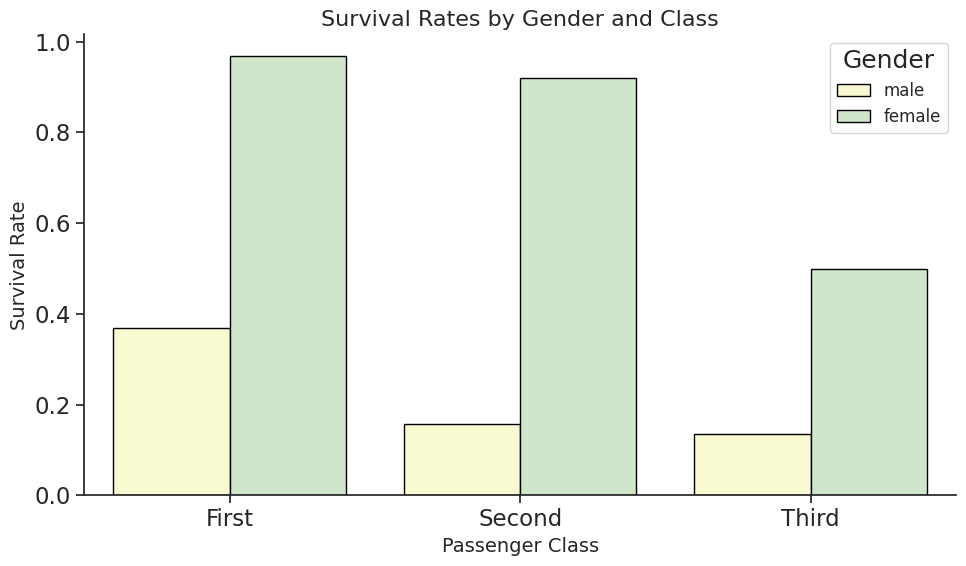

In [ ]:
# Set up Seaborn theme
sns.set_theme(style="ticks", palette="Pastel2_r")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Visualization: Survival rates by gender and class
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='class', y='survived', hue='sex', errorbar=None, palette="Pastel1_r", edgecolor="k")
plt.title("Survival Rates by Gender and Class", fontsize=16)
plt.xlabel("Passenger Class", fontsize=14)
plt.ylabel("Survival Rate", fontsize=14)
plt.legend(title="Gender", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()




### **Follow-Up Tests for Gender and Class Interaction**
1. **Chi-Squared Test for Independence**:
   - Test whether gender and class are associated with survival.
   - This is a good follow-up because it can determine if the differences in survival rates between genders and classes are statistically significant.
   - **Null Hypothesis (\(H_0\))**: Gender and class are independent of survival.
   - **Alternative Hypothesis (\(H_1\))**: Gender and class are associated with survival.

2. **Two-Way ANOVA** (if survival rate is treated as continuous):
   - Investigate how gender and class jointly influence survival rates.
   - **Null Hypotheses**:
     1. Gender does not affect survival rate.
     2. Class does not affect survival rate.
     3. There is no interaction effect between gender and class on survival rate.

3. **Post-Hoc Pairwise Comparisons** (if ANOVA is significant):
   - Conduct pairwise comparisons between groups (e.g., women vs. men within First Class) to identify specific differences.







### **Hypothesis for Chi-Squared Test**
1. **Null Hypothesis (\(H_0\))**: Gender and survival are independent (no association).
2. **Alternative Hypothesis (\(H_1\))**: Gender and survival are associated (an association exists).

---

### **Steps**
1. **Create a Contingency Table**:
   - Cross-tabulate gender and survival to calculate observed frequencies.
2. **Perform the Chi-Squared Test**:
   - Compare the observed frequencies with the expected frequencies under the assumption of independence.
3. **Interpret Results**:
   - A significant p-value (\(p < 0.05\)) suggests an association between gender and survival.

---

### **Explanation of Key Outputs**
1. **Contingency Table**:
   - Shows the observed frequencies of survivors and non-survivors for each gender.
2. **Chi-Squared Statistic**:
   - Quantifies the difference between observed and expected frequencies.
3. **P-Value**:
   - Tells us whether the observed association is statistically significant.
4. **Expected Frequencies**:
   - The frequencies we would expect if gender and survival were truly independent.

---

### **What to Look For**
- **Chi-Squared Value**: Larger values indicate greater deviation from the null hypothesis.
- **P-Value**: Determines statistical significance.
- **Expected Frequencies**: Compare to observed frequencies to understand the direction of any association.


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(titanic['sex'], titanic['survived'])
print("Contingency Table:")
print(contingency_table)

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print("\nChi-Squared Test Results:")
print(f"Chi-Squared Statistic: {chi2:.2f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p <= alpha:
    print("\nConclusion: Reject the null hypothesis. Gender and survival are associated.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. No association between gender and survival.")


Contingency Table:
survived    0    1
sex               
female     81  233
male      468  109

Chi-Squared Test Results:
Chi-Squared Statistic: 260.72
P-Value: 0.0000
Degrees of Freedom: 1

Expected Frequencies:
[[193.47474747 120.52525253]
 [355.52525253 221.47474747]]

Conclusion: Reject the null hypothesis. Gender and survival are associated.


### **Interpretation of Chi-Squared Test Results**

#### **Contingency Table**
- **Observed Frequencies**:
  - Female: 81 did not survive, 233 survived.
  - Male: 468 did not survive, 109 survived.
- This highlights a stark difference in survival rates between genders, with a much higher survival count for women.

---

#### **Chi-Squared Test Results**
1. **Chi-Squared Statistic (\(260.72\))**:
   - Indicates a substantial deviation between observed and expected frequencies under the null hypothesis of no association.
   - Larger values imply stronger evidence against the null hypothesis.

2. **P-Value (\(0.0000\))**:
   - Far below the significance threshold (alpha = 0.05).
   - This provides overwhelming evidence to **reject the null hypothesis**.

3. **Degrees of Freedom (1)**:
   - Indicates the complexity of the test; in this case, only one degree of freedom as there are two genders and two survival outcomes.

---

#### **Expected Frequencies**
- These are the frequencies we would expect if gender and survival were truly independent:
  - Female: \(193.47\) not survived, \(120.53\) survived.
  - Male: \(355.53\) not survived, \(221.47\) survived.
- Comparing expected to observed frequencies shows:
  - **Females** had far more survivors (\(233\)) than expected under independence (\(120.53\)).
  - **Males** had far fewer survivors (\(109\)) than expected (\(221.47\)).
- This suggests a strong association between gender and survival, favoring females.

---

#### **Conclusion**
- **Reject the Null Hypothesis (\(H_0\))**:
  - Gender and survival are not independent.
  - The association indicates that gender played a significant role in survival outcomes.
- **Real-World Context**:
  - Reflects the historical policy of prioritizing "women and children first" during the Titanic evacuation.

---

### **Next Steps**
1. **Visualization**:
   - Plot the observed and expected frequencies side by side for clarity.
   - Create a heatmap to illustrate the deviation between observed and expected frequencies.

2. **Further Analysis**:
   - Explore survival rates by gender and class to determine if class influenced the gender-survival association.
   - Proceed with **Two-Way ANOVA** to test for interaction effects.



#### Bar Plot for Observed and Expected Frequencies

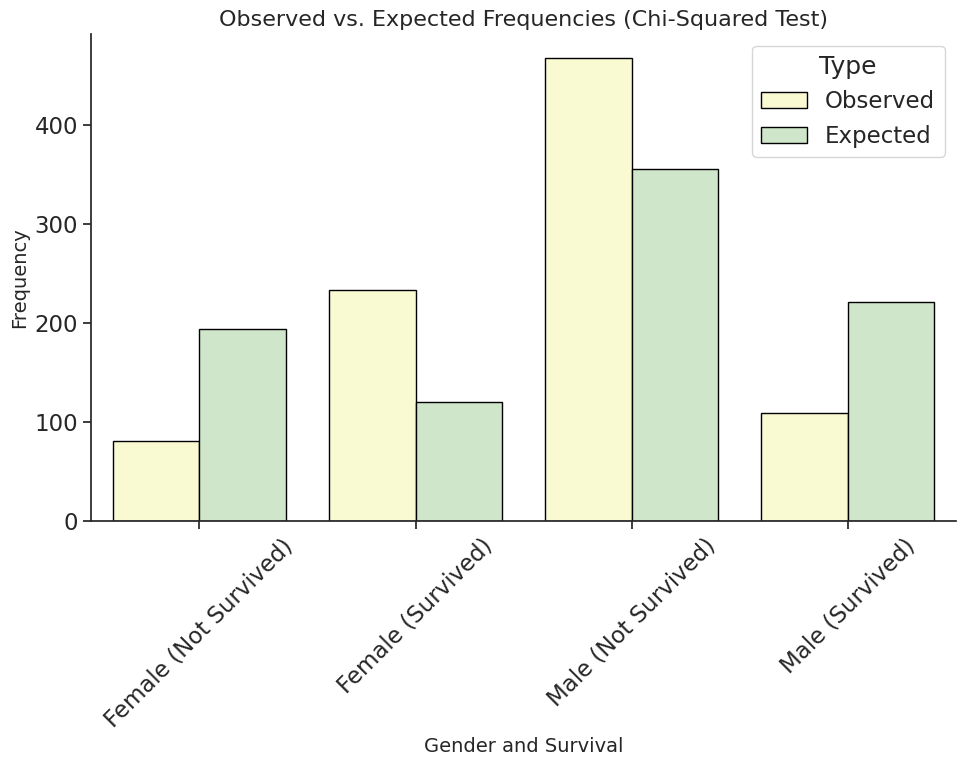

In [ ]:
# Prepare data for side-by-side bar plot
observed = contingency_table.values.flatten()
expected = expected.flatten()
categories = ["Female (Not Survived)", "Female (Survived)", "Male (Not Survived)", "Male (Survived)"]

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({
    "Category": categories,
    "Observed": observed,
    "Expected": expected
}).melt(id_vars="Category", var_name="Type", value_name="Frequency")

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=plot_data, x="Category", y="Frequency", hue="Type", palette="Pastel1_r", edgecolor="k")
plt.title("Observed vs. Expected Frequencies (Chi-Squared Test)", fontsize=16)
plt.xlabel("Gender and Survival", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Type")
sns.despine()
plt.tight_layout()
plt.show()


### **Two-Way ANOVA for Gender and Class Effects on Survival**

To test the joint effects of **gender** and **class** on survival rates, we’ll use a **Two-Way ANOVA**. This method extends One-Way ANOVA by analyzing multiple independent variables (gender and class) and their interaction.

---

### **Hypotheses for Two-Way ANOVA**
1. **Main Effects**:
   - **Null Hypothesis (\(H_0\))**: Gender has no effect on survival rate.
   - **Alternative Hypothesis (\(H_1\))**: Gender has an effect on survival rate.
   - **Null Hypothesis (\(H_0\))**: Class has no effect on survival rate.
   - **Alternative Hypothesis (\(H_1\))**: Class has an effect on survival rate.
2. **Interaction Effect**:
   - **Null Hypothesis (\(H_0\))**: There is no interaction between gender and class on survival rate.
   - **Alternative Hypothesis (\(H_1\))**: There is an interaction between gender and class on survival rate.

---

### **Steps**
1. **Test for Interaction**:
   - Assess if the effect of gender on survival depends on the class.
2. **Test Main Effects**:
   - Evaluate the independent effects of gender and class on survival.


---

### **Explanation of Key Outputs**
1. **Main Effects**:
   - \(p\)-values for **C(sex)** and **C(class)** indicate whether gender and class independently affect survival.
2. **Interaction Effect**:
   - \(p\)-value for **C(sex):C(class)** assesses if the effect of gender on survival depends on class.
3. **F-Statistic**:
   - Higher values indicate stronger effects of the variable on survival.



In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Prepare the data
titanic['survived'] = titanic['survived'].astype(float)  # Ensure survival is numeric for ANOVA

# Two-Way ANOVA model
model = ols('survived ~ C(sex) + C(pclass) + C(sex):C(pclass)', data=titanic).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Output results
print("Two-Way ANOVA Results:")
print(anova_results)

# Interpretation of Key Metrics
print("\nKey Metrics:")
print(f"Main Effect of Gender (p-value): {anova_results.loc['C(sex)', 'PR(>F)']:.4f}")
print(f"Main Effect of Class (p-value): {anova_results.loc['C(pclass)', 'PR(>F)']:.4f}")
print(f"Interaction Effect (p-value): {anova_results.loc['C(sex):C(pclass)', 'PR(>F)']:.4f}")

# Interpretation
alpha = 0.05
if anova_results.loc['C(sex):C(pclass)', 'PR(>F)'] <= alpha:
    print("\nConclusion: There is a significant interaction effect between gender and class on survival.")
else:
    print("\nConclusion: No significant interaction effect between gender and class on survival.")


Two-Way ANOVA Results:
                      sum_sq     df           F        PR(>F)
C(sex)             53.165350    1.0  368.191786  6.962809e-69
C(pclass)          15.286098    2.0   52.931238  1.934085e-22
C(sex):C(pclass)    5.437720    2.0   18.829215  9.812394e-09
Residual          127.790290  885.0         NaN           NaN

Key Metrics:
Main Effect of Gender (p-value): 0.0000
Main Effect of Class (p-value): 0.0000
Interaction Effect (p-value): 0.0000

Conclusion: There is a significant interaction effect between gender and class on survival.


### **Interpretation of Two-Way ANOVA Results**

The results provide valuable insights into how **gender** and **class** independently and interactively influence survival on the Titanic.

---

#### **Key Metrics and Their Implications**
1. **Main Effect of Gender (\(p < 0.0001\))**:
   - The highly significant p-value indicates that gender has a strong independent effect on survival.
   - This aligns with the observation that women had much higher survival rates than men.

2. **Main Effect of Class (\(p < 0.0001\))**:
   - A significant p-value shows that the passenger class also had an independent effect on survival.
   - Passengers in First Class were more likely to survive compared to those in Second or Third Class.

3. **Interaction Effect Between Gender and Class (\(p < 0.0001\))**:
   - A significant p-value here reveals that the effect of gender on survival depended on passenger class.
   - For example, women in First Class may have had higher survival rates compared to women in Third Class, while men across classes might not have had equal survival rates.

---

#### **What Does the Interaction Mean?**
The interaction effect suggests that the relationship between gender and survival varies depending on the passenger class. In practical terms:
- **Women in higher classes** (e.g., First Class) may have had significantly better survival outcomes than women in lower classes.
- **Men in different classes** might have experienced smaller survival rate differences, as gender was less of a survival advantage for them.

---

#### **Residuals**
The residuals represent the variation in survival that remains unexplained by the model. While some variance remains, the significant results for both main and interaction effects indicate the model captures key survival determinants.

---

### **Next Steps**
1. **Post-Hoc Analysis**:
   - Conduct pairwise comparisons using a method like Tukey’s HSD or Games-Howell to identify which specific gender-class combinations have significantly different survival rates.

2. **Visualization**:
   - Create an **interaction plot** to visually explore how survival rates vary across gender and class combinations.



#### **Interaction plot**
Visualize how the effect of one variable (e.g., gender) on survival depends on another variable (e.g., class).

### **What to Look For**
1. **Lines Crossing**:
   - If the lines cross, it suggests a significant interaction between the variables.
   - For example, the survival rate for women might decrease more steeply across classes than for men.

2. **Parallel Lines**:
   - If the lines are roughly parallel, it suggests no interaction effect between the variables.



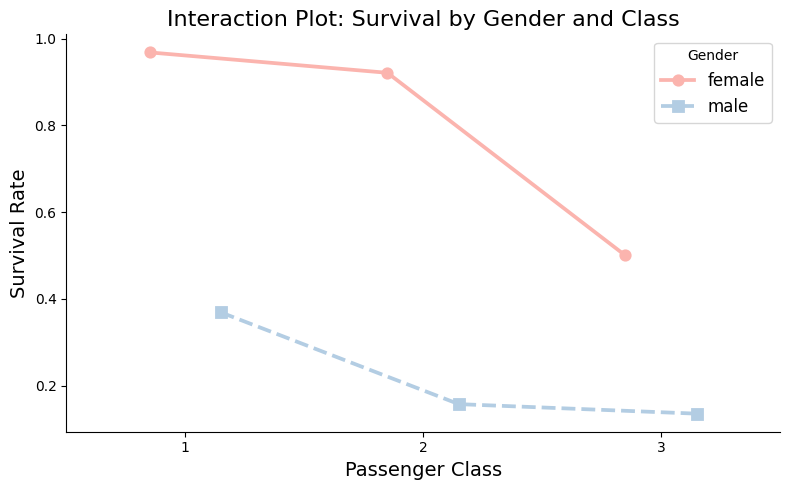

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate survival rates by gender and class
interaction_data = titanic.groupby(['sex', 'pclass'])['survived'].mean().reset_index()

# Create interaction plot
plt.figure(figsize=(8, 5))
sns.pointplot(
    data=interaction_data,
    x='pclass',
    y='survived',
    hue='sex',
    palette='Pastel1',
    markers=['o', 's'],
    linestyles=['-', '--'],
    dodge=0.3
)
plt.title("Interaction Plot: Survival by Gender and Class", fontsize=16)
plt.xlabel("Passenger Class", fontsize=14)
plt.ylabel("Survival Rate", fontsize=14)
plt.legend(title="Gender", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


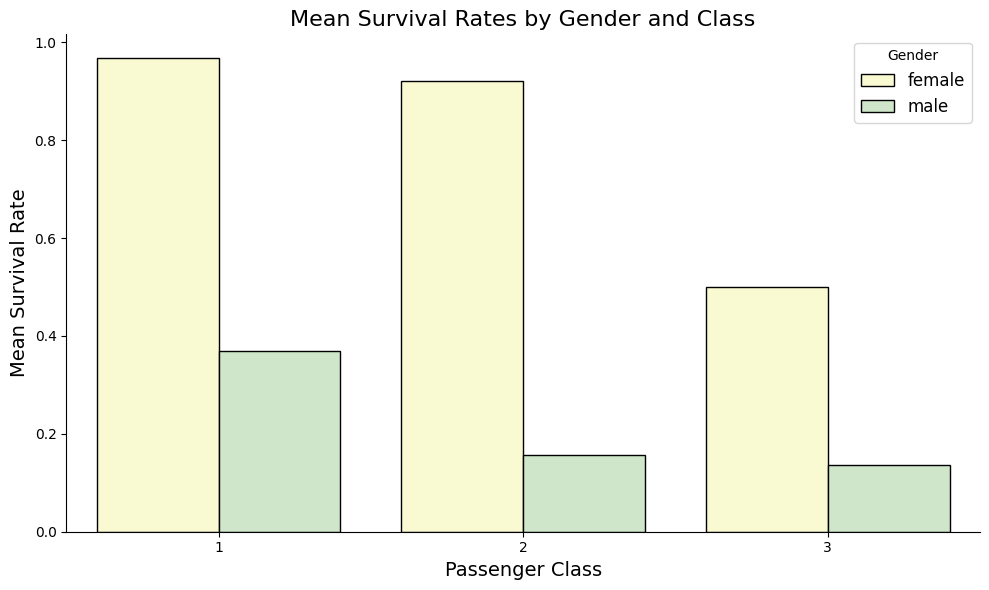

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean survival rates for each gender-class combination
gender_class_means = titanic.groupby('gender_class')['survived'].mean().reset_index()

# Extract gender and class into separate columns for better visualization
gender_class_means[['Gender', 'Class']] = gender_class_means['gender_class'].str.split(' - ', expand=True)

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=gender_class_means,
    x='Class',
    y='survived',
    hue='Gender',
    palette="Pastel1_r",
    edgecolor="k"
)

# Customize the plot
plt.title("Mean Survival Rates by Gender and Class", fontsize=16)
plt.xlabel("Passenger Class", fontsize=14)
plt.ylabel("Mean Survival Rate", fontsize=14)
plt.legend(title="Gender", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a combined gender-class column
titanic['gender_class'] = titanic['sex'] + " - " + titanic['pclass'].astype(str)

# Perform Tukey’s HSD test
tukey_results = pairwise_tukeyhsd(
    endog=titanic['survived'],     # Dependent variable
    groups=titanic['gender_class'],  # Grouping variable
    alpha=0.05                     # Significance level
)

# Output results
print("Tukey’s HSD Test Results:")
print(tukey_results)

# # Visualization
# plt.figure(figsize=(10, 6))
# tukey_results.plot_simultaneous()
# plt.title("Tukey’s HSD Test: Survival Rates by Gender-Class Combination", fontsize=16)
# plt.tight_layout()
# plt.show()


Tukey’s HSD Test Results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
female - 1 female - 2   -0.047 0.9671 -0.2144  0.1204  False
female - 1 female - 3  -0.4681    0.0  -0.612 -0.3242   True
female - 1   male - 1  -0.5992    0.0 -0.7482 -0.4503   True
female - 1   male - 2  -0.8107    0.0 -0.9638 -0.6576   True
female - 1   male - 3  -0.8326    0.0 -0.9588 -0.7064   True
female - 2 female - 3  -0.4211    0.0 -0.5749 -0.2672   True
female - 2   male - 1  -0.5522    0.0 -0.7108 -0.3936   True
female - 2   male - 2  -0.7636    0.0 -0.9261 -0.6012   True
female - 2   male - 3  -0.7856    0.0 -0.9231 -0.6482   True
female - 3   male - 1  -0.1311 0.0576 -0.2647  0.0024  False
female - 3   male - 2  -0.3426    0.0 -0.4807 -0.2044   True
female - 3   male - 3  -0.3646    0.0 -0.4721  -0.257   True
  male - 1   male - 2  -0.2114 0.0004 -0.3548 -0.0681   Tru

### **Post-Hoc Analysis**
For pairwise comparisons, we'll use **Tukey’s HSD** because we confirmed that the variances were equal. Tukey’s test will help us identify which specific gender-class combinations differ significantly in survival rates.

---

### **Explanation of Key Outputs**
1. **Tukey’s HSD Table**:
   - `group1` and `group2`: Pair of gender-class combinations being compared.
   - `meandiff`: Difference in mean survival rates between the groups.
   - `p-adj`: Adjusted p-value; significant if \(p < 0.05\).
   - `reject`: Whether the null hypothesis (means are equal) is rejected for that pair.

### **Interpretation of Tukey’s HSD Results**

The Tukey’s HSD test results reveal pairwise comparisons between gender-class combinations to determine which pairs differ significantly in survival rates.

---

#### **Key Takeaways**
1. **Significant Differences (\(p < 0.05\))**:
   - Many comparisons between **female** and **male** groups across classes are statistically significant. For example:
     - **Female - 1 (First Class)** vs. **Male - 1 (First Class)** (\(p < 0.001\)): Women in First Class had significantly higher survival rates than men in First Class.
     - **Female - 1 (First Class)** vs. **Female - 3 (Third Class)** (\(p < 0.001\)): Women in First Class had significantly higher survival rates than women in Third Class.
   - Differences between **male** groups are also evident:
     - **Male - 1 (First Class)** vs. **Male - 3 (Third Class)** (\(p < 0.001\)): Men in First Class had significantly higher survival rates than men in Third Class.

2. **Non-Significant Differences (\(p > 0.05\))**:
   - Some pairs, such as **Female - 1 (First Class)** vs. **Female - 2 (Second Class)**, showed no significant difference in survival rates.
   - Similarly, the difference between **Male - 2 (Second Class)** and **Male - 3 (Third Class)** was not statistically significant.

3. **Direction and Magnitude**:
   - The **meandiff** values show the direction and magnitude of survival rate differences:
     - Negative values indicate lower survival rates for the second group compared to the first.
     - For example, the survival rate for **Female - 1 (First Class)** was 0.5992 higher than for **Male - 1 (First Class)**.



#### **What is a Binomial Distribution?**

A **binomial distribution** is a type of probability distribution that models the number of successes in a fixed number of trials, where each trial has only two possible outcomes (e.g., success or failure, survived or did not survive). It is one of the most fundamental distributions in statistics, particularly for analyzing categorical or binary data.

---

### **Key Characteristics of a Binomial Distribution**

1. **Binary Outcomes**:
   - Each trial has only two possible outcomes, often referred to as **success** (\(1\)) or **failure** (\(0\)).
   - Example: Survival on the Titanic (1 = Survived, 0 = Did Not Survive).

2. **Fixed Number of Trials (\(n\))**:
   - The total number of experiments or observations is predetermined.
   - Example: The total number of passengers on the Titanic.

3. **Constant Probability (\(p\))**:
   - The probability of success (\(p\)) remains the same for every trial.
   - Example: If 38% of Titanic passengers survived, then \(p = 0.38\) for each passenger.

4. **Independence**:
   - The outcome of one trial does not affect the outcome of another trial.
   - Example: One passenger’s survival does not influence another passenger’s survival.

5. **Probability Mass Function (PMF)**:
   - The probability of exactly \(k\) successes in \(n\) trials

---

### **When to Use a Binomial Distribution**
- You want to model the probability of a certain number of successes in a fixed number of trials.
- Examples:
  - Flipping a coin \(n\) times and counting the number of heads.
  - Testing a drug’s effectiveness and counting how many patients respond positively.
  - Determining survival rates in a dataset like Titanic.

---

### **Why is the Titanic Data Binomial?**
1. **Binary Outcome**: Each passenger either survived (\(1\)) or did not (\(0\)).
2. **Fixed Trials**: There is a known total number of passengers (\(n\)).
3. **Constant Probability**: The probability of survival (\(p\)) is assumed to be consistent for passengers in similar groups.
4. **Independence**: Each passenger's outcome is independent of the others.

---

### **What Makes the Binomial Distribution Useful?**
- It helps us understand and predict probabilities for binary events.
- It forms the basis for many statistical tests, such as the **proportions Z-test**.
- When \(n\) is large, the binomial distribution approximates a normal distribution, making it versatile for analysis.

In a way, our hypothesis testing examines whether the assumption of **constant probability** (\(p\)) is valid for specific groups within the dataset. Here's how this relates to our testing:

---

### **Hypothesis Testing and the Assumption of Constant Probability**
When we compare survival rates (e.g., between genders or classes), we're testing if the probability of survival (\(p\)) is the **same across groups**. If our statistical test finds a significant difference, it suggests that the assumption of a constant survival probability across those groups is not valid.

---

### **Examples from Our Hypotheses**

1. **Survival by Gender**:
   - **Hypothesis**: Does \(p\) differ between men and women?  
   - **Assumption**: If survival probability (\(p\)) is constant across genders, then men and women should have equal survival rates.  
   - **Testing**: We perform a proportions Z-test. A significant result (\(p < 0.05\)) would indicate that \(p\) is not constant between genders, meaning gender influences survival probability.

2. **Survival by Class**:
   - **Hypothesis**: Does \(p\) differ across passenger classes (First, Second, Third)?  
   - **Assumption**: If \(p\) is constant across classes, the survival rates should be equal for all classes.  
   - **Testing**: We use ANOVA or a chi-squared test to see if survival rates differ significantly across classes. A significant result would suggest that class influences survival probability.

---

### **Key Point**
- **What we’re testing**: Whether the survival probability (\(p\)) is constant across groups like gender or class.  
- **What it tells us**: If \(p\) is not constant, it implies the group characteristic (e.g., gender or class) has a significant impact on survival rates. This is crucial for understanding biases or patterns in the data.

---

### **When is \(p\) Assumed Constant?**
1. In a **single group**: If we’re testing one group in isolation (e.g., the entire dataset), \(p\) is assumed to be constant within that group.  
2. Across **independent groups**: Hypothesis testing determines if \(p\) can reasonably be considered constant across groups or if differences exist.

---

### **In Practice**
By testing survival rates across groups, we’re not only challenging the assumption of a constant probability but also uncovering factors that may influence survival. This approach aligns with the goals of statistical testing: to identify patterns and validate or reject assumptions.



The **binomial distribution** and the **Bernoulli distribution** are closely related. In fact, the binomial distribution is a generalization of the Bernoulli distribution. Here's how they are connected:

---

#### **What is a Bernoulli Distribution**
- The **Bernoulli distribution** models a single trial with only two outcomes: **success** (\(1\)) or **failure** (\(0\)).
- It is characterized by a single parameter, \(p\), which represents the probability of success.
- **Example**: Flipping a coin once, where heads is a success (\(p = 0.5\)).

---

### **The Binomial Distribution**
- The **binomial distribution** models the total number of successes (\(k\)) in a fixed number (\(n\)) of **independent Bernoulli trials**.
- It is characterized by two parameters:
  1. \(n\): The number of trials.
  2. \(p\): The probability of success for each trial.
- **Example**: Flipping a coin 10 times and counting the number of heads.

---

### **Relationship Between the Two**
1. **Single Trial vs. Multiple Trials**:
   - A Bernoulli distribution describes a single trial.
   - A binomial distribution describes the outcomes of multiple independent Bernoulli trials.

2. **Special Case**:
   - The binomial distribution reduces to a Bernoulli distribution when \(n = 1\).

3. **Construction**:
   - A binomial random variable is the **sum of \(n\) independent Bernoulli random variables**.
   - Example: If you flip a coin 3 times, each flip follows a Bernoulli distribution, and the total number of heads follows a binomial distribution.

---

### **Why This Matters**
- In the context of the Titanic dataset:
  - Each passenger's survival (1 = survived, 0 = did not survive) can be modeled as a Bernoulli trial.
  - The overall survival rate for the dataset (e.g., the number of survivors out of the total passengers) can be modeled as a binomial distribution.

---

### **In Summary**
- The **Bernoulli distribution** is the foundation of the **binomial distribution**.
- **Binomial = Sum of Bernoulli Trials**:
  - Bernoulli: Probability of survival for one passenger.
  - Binomial: Total number of survivors in a group of passengers.


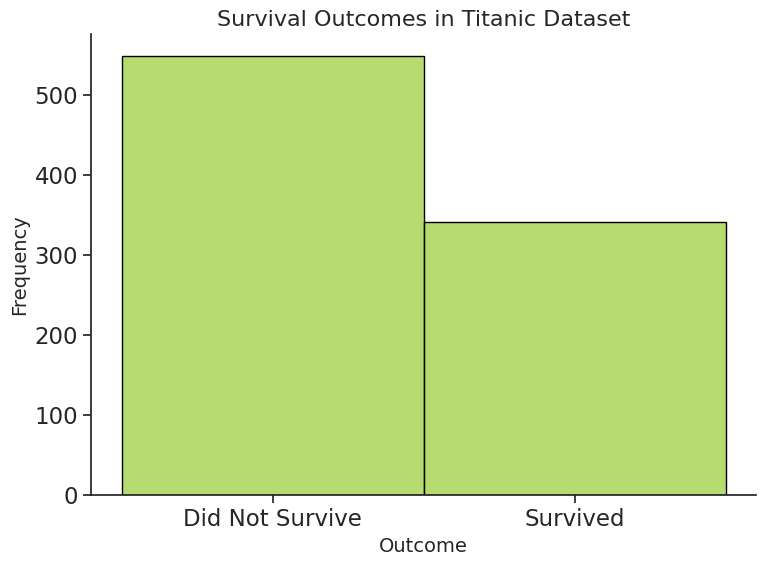

In [ ]:
# Plot actual survival data from Titanic dataset
plt.figure(figsize=(8, 6))

sns.histplot(actual_survival, discrete=True, kde=False, color="yellowgreen", edgecolor="k", alpha=0.7)
plt.title("Survival Outcomes in Titanic Dataset", fontsize=16)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.xlabel("Outcome", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()